In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [41]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [42]:
df.shape   # Get data dimension

(4177, 9)

In [43]:
df.describe() # statistical Summary

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [45]:
df.isna().sum()  # finding the null values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [46]:
# ladel encoding is needed to convert dataset into 0 and 1 so that we can check the correlation of target variable with other column
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Sex']=LE.fit_transform(df['Sex'])
df.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


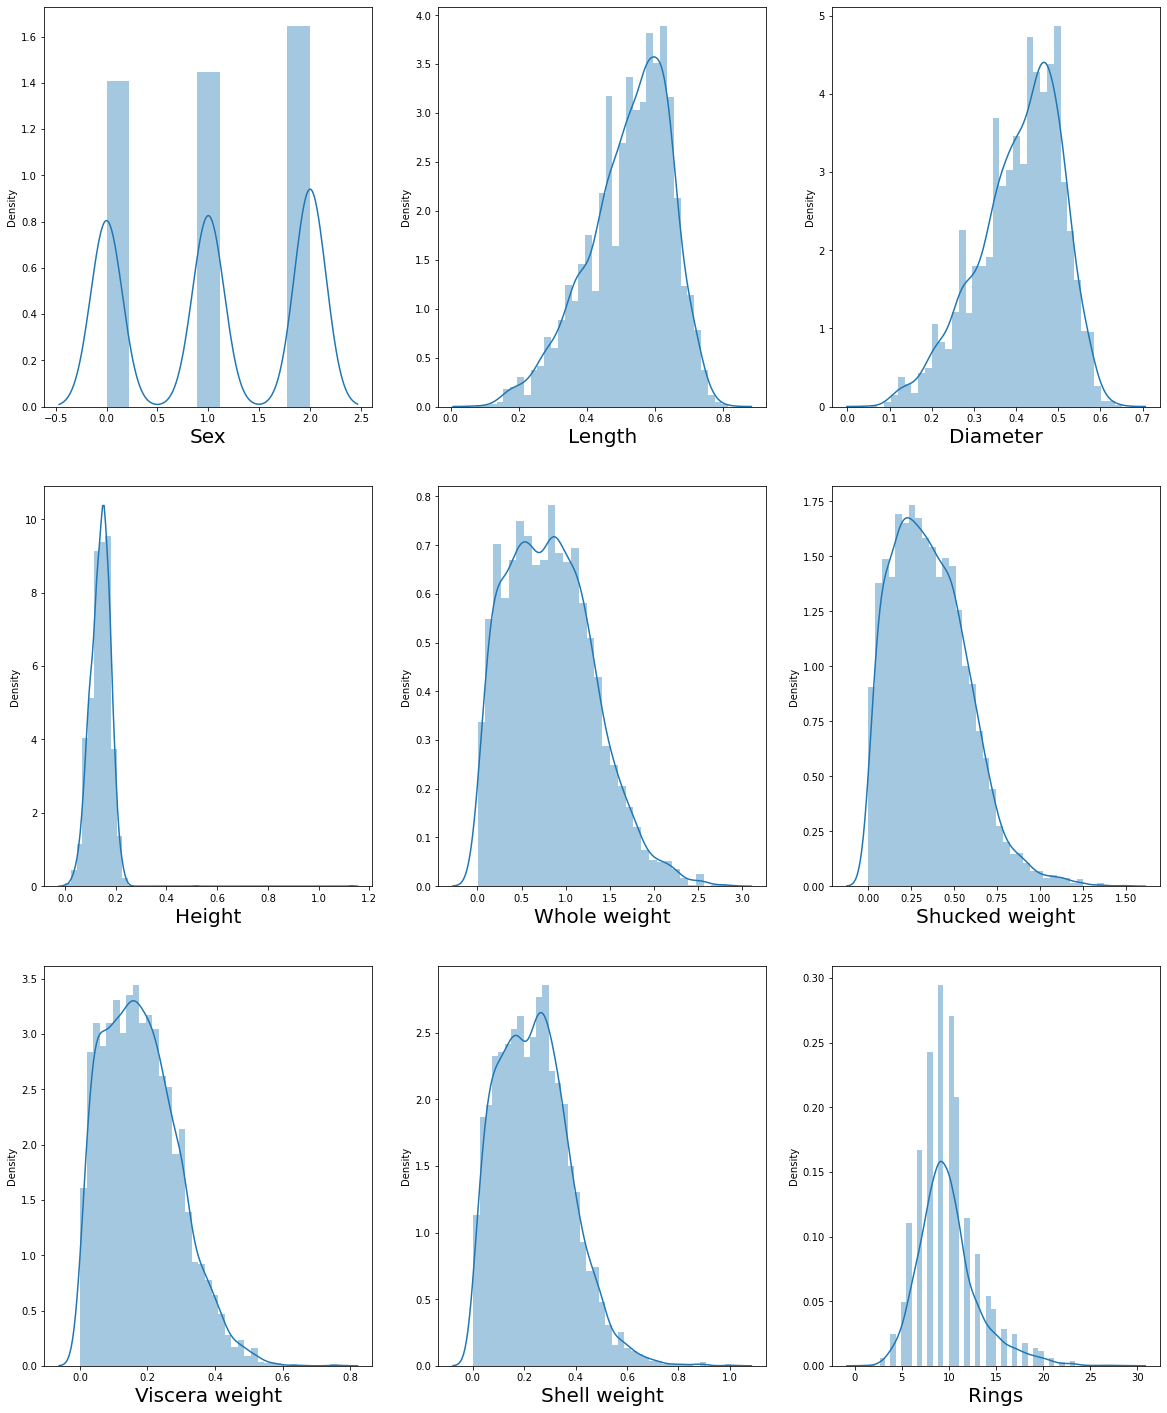

In [47]:
#  let see how data is distributed with every column
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

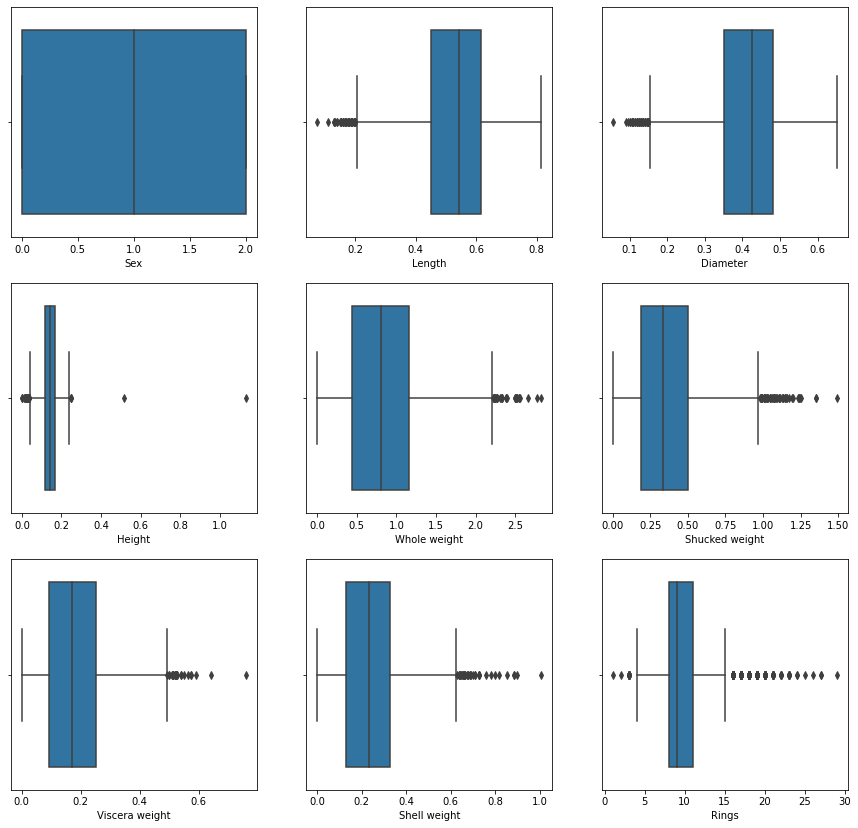

In [48]:
#visualizing data for outliers
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
        
    graph+=1
plt.show()

In [49]:
q1=df.quantile(0.25)
q1

Sex               0.0000
Length            0.4500
Diameter          0.3500
Height            0.1150
Whole weight      0.4415
Shucked weight    0.1860
Viscera weight    0.0935
Shell weight      0.1300
Rings             8.0000
Name: 0.25, dtype: float64

In [50]:
q3=df.quantile(0.75)
q3

Sex                2.000
Length             0.615
Diameter           0.480
Height             0.165
Whole weight       1.153
Shucked weight     0.502
Viscera weight     0.253
Shell weight       0.329
Rings             11.000
Name: 0.75, dtype: float64

In [51]:
iqr=q3-q1
iqr

Sex               2.0000
Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
dtype: float64

In [52]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [53]:
df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [54]:
df.corr()['Rings'].sort_values()

Sex              -0.034627
Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [55]:
df.corr() # correlation matrix

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


### Plotting Heatmap 

<AxesSubplot:>

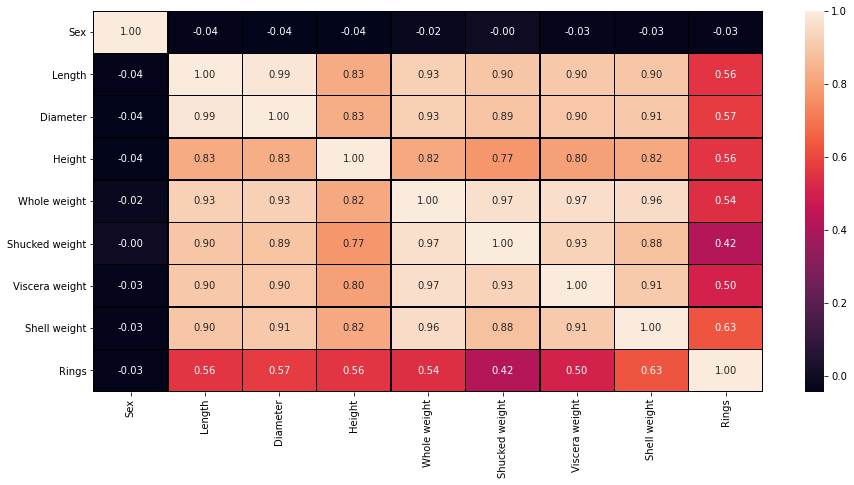

In [56]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidths=0.5, linecolor='black', fmt='.2f')

<AxesSubplot:xlabel='Length', ylabel='Density'>

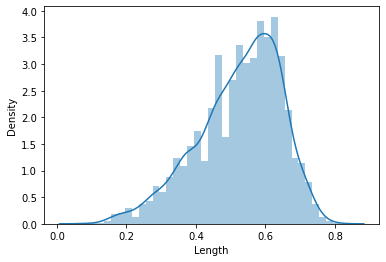

In [57]:
sns.distplot(df['Length'])

In [58]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(4177, 9)

In [59]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [60]:
len(np.where(z>3)[0])

200

In [61]:
df_new=df[(z<3).all(axis=1)]
print('Old DataFrame',df.shape)
print('New DataFrame',df_new.shape)
print('total_dropped_rows',df.shape[0]-df_new.shape[0])

Old DataFrame (4177, 9)
New DataFrame (4027, 9)
total_dropped_rows 150


In [62]:
loss_percentage=(4177-4027)/4177*100
print(loss_percentage,'%')

3.5910940866650707 %


In [63]:
# independent features
x=df_new.iloc[:,:-1]
#target
y=df_new.iloc[:,-1]

In [64]:
# remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.13432919, -0.68445079, -0.54337947, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [ 1.13432919, -1.4117394 , -1.40113174, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-1.31306782, -0.0462191 ,  0.03716259, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 1.13432919,  0.65112915,  0.70592133, ...,  0.90189694,
         1.08965131,  0.66363183],
       [-1.31306782,  0.92606411,  0.8377131 , ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.13432919,  1.9719402 ,  1.85550496, ...,  2.31446634,
         1.73214622,  1.85675543]])

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x


array([[ 1.13432919, -0.68445079, -0.54337947, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [ 1.13432919, -1.4117394 , -1.40113174, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-1.31306782, -0.0462191 ,  0.03716259, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 1.13432919,  0.65112915,  0.70592133, ...,  0.90189694,
         1.08965131,  0.66363183],
       [-1.31306782,  0.92606411,  0.8377131 , ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.13432919,  1.9719402 ,  1.85550496, ...,  2.31446634,
         1.73214622,  1.85675543]])

# Training the data

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [67]:
# model instantiating and training
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
maxAcc=0  #maximum acciuracy
maxRS=0   # best random state value for which maximun accuracy is achieved
for i in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)    # fitting the data will train our model
    predrf=lr.predict(x_test)  # predicted target varibale
    acc=accuracy_score(y_test,predrf)  # accuracy score
    if acc > maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc, 'on Random_state', maxRS)

Best accuracy is 0.3213399503722084 on Random_state 50


In [68]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range (2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print('At cv:-',j)
    print('cross validation score is:-',lsc*100)
    print('accuracy_score is:-', lss*100)
    print('\n')

At cv:- 2
cross validation score is:- 27.39026023005381
accuracy_score is:- 25.806451612903224


At cv:- 3
cross validation score is:- 27.266087630698298
accuracy_score is:- 25.806451612903224


At cv:- 4
cross validation score is:- 26.794471502662276
accuracy_score is:- 25.806451612903224


At cv:- 5
cross validation score is:- 27.01838694265062
accuracy_score is:- 25.806451612903224


At cv:- 6
cross validation score is:- 26.522026470796966
accuracy_score is:- 25.806451612903224


At cv:- 7
cross validation score is:- 26.943883712905453
accuracy_score is:- 25.806451612903224


At cv:- 8
cross validation score is:- 26.6205347281391
accuracy_score is:- 25.806451612903224


At cv:- 9
cross validation score is:- 26.69544094669934
accuracy_score is:- 25.806451612903224




In [69]:
#Finding best Random state

from sklearn.svm import SVC
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    svc=SVC()
    svc.fit(x_train,y_train)
    predrf=svc.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.31017369727047145 on Random_state 57


In [70]:
from sklearn.linear_model import LinearRegression
LReg=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=200)
LReg.fit(x_train, y_train)

LinearRegression()

In [71]:
LReg.score(x_train,y_train)

0.5085375204995686

In [72]:
LReg.score(x_test,y_test)

0.5265631036764362

In [73]:
y_pred=LReg.predict(x_test)
y_pred

array([ 9.52817951,  8.28024224, 11.58061032, 10.56731462,  7.40814468,
        6.33743202,  7.64028827, 10.50281256,  7.97239065,  8.2012793 ,
       13.08205459, 11.76328998,  8.14506246, 15.14147345,  7.87596623,
       10.27746202,  7.43198983,  6.30209637, 10.52934823, 11.10283867,
       11.31480372,  7.58168392,  9.85950588, 12.19555867, 12.04816483,
       11.870848  , 10.03010895, 14.81881309,  9.11563136,  8.50067203,
       11.0645413 , 10.11502187,  9.38572866,  5.68712265, 11.97548586,
        7.4432434 ,  8.63912398, 11.55859094, 12.05834552, 10.5365153 ,
        8.75288229,  8.33586051, 10.01135498, 13.02667114, 11.13761726,
        8.55303836,  7.478115  , 12.68799823,  8.75934468,  9.64866351,
        7.08822412,  8.65201474,  9.97899275,  8.85358452,  9.3759323 ,
       10.91749801,  8.78567657, 11.48642919, 10.33172189, 11.94283157,
       10.4918941 , 10.62250334, 10.25422753,  7.57598874,  9.08168687,
        8.0078836 ,  7.36236306,  9.33381155,  9.54582656, 12.17

In [82]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

y_pred=LReg.predict(x_test)

In [75]:
mean_absolute_error(y_test,y_pred)

1.4385023678584654

In [76]:
mean_squared_error(y_test,y_pred)

3.745506210280618

In [77]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.9353310337719019

In [78]:
#checking the overfitting case with Lasso and Ridge
from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV
lasscv=LassoCV(alphas=None, normalize=True)
lasscv.fit(x_train, y_train)

LassoCV(normalize=True)

In [79]:
alpha=lasscv.alpha_
alpha

3.205547130306254e-05

In [80]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.205547130306254e-05)

In [81]:
lasso_reg.score(x_test, y_test)

0.5265885007749367

#### Linear Regression have better performance and it is not overfitted